In [2]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

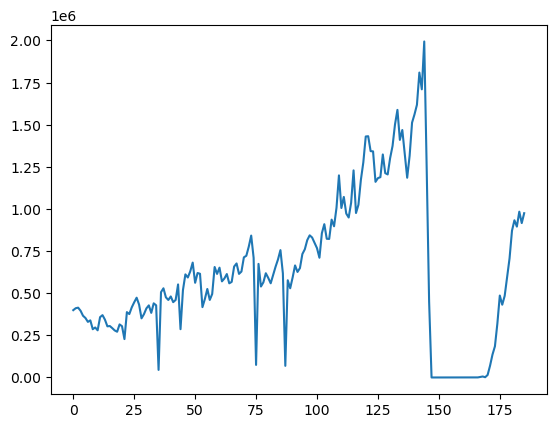

In [3]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 3 (90-5-5).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [5]:
train_size = 168
validation_size = 9
test_size = 9

In [6]:
train = df1[0:168, :]
train.shape

(168, 1)

In [7]:
validation = df1[169:177, :]
validation.shape

(8, 1)

In [8]:
test = df1[177:186, :]
test.shape

(9, 1)

In [9]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [11]:
x_test, y_test = get_data(test, look_back)

In [12]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [13]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(12, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

2023-08-21 22:20:20.291636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
166/166 [==============================] - 2s 2ms/step - loss: 0.0222
Epoch 2/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 3/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 4/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 5/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 6/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 7/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 8/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 9/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 10/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 11/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 12/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 13/50
166/166 [====

In [14]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 468ms/step


In [15]:
scaler.scale_

array([5.01473077e-07])

In [16]:
y_pred = scaler.inverse_transform(y_pred)

In [17]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [18]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 84864.03746476401


In [20]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 77474.13392857143


In [21]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 0.09449202963661227


In [22]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 9.958946037004317


In [23]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 10.366161757402805


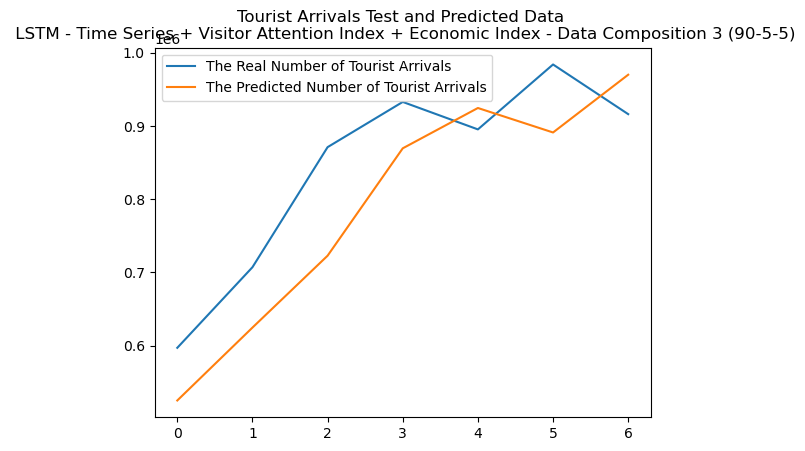

In [24]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series + Visitor Attention Index + Economic Index - Data Composition 3 (90-5-5)")
plt.legend()
plt.show()